William Thompson

# Combined Cycle Power Plant Data Set - Regression

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant. The columns are different features that are used to predict the energy output of the plant when working with a full load.

### Load and Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_excel("Folds5x2_pp.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


ii. Make pairwise scatterplots of all the variables in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

The relationship between ambient temperature and enegry output appears to be negatively correlated.


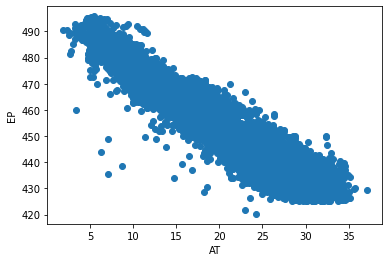

In [2]:
plt.scatter(data['AT'], data['PE'])
plt.ylabel("EP")
plt.xlabel("AT")
print("The relationship between ambient temperature and enegry output appears to be negatively correlated.")

The relationship between ambient pressure and enegry output appears have a weak, positive correlation at lower energy outputs.


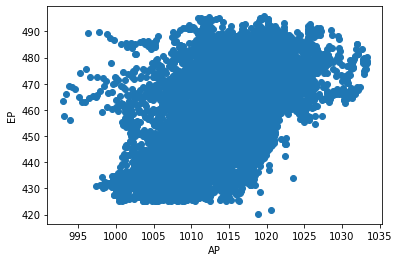

In [3]:
plt.scatter(data['AP'], data['PE'])
plt.ylabel("EP")
plt.xlabel("AP")
print("The relationship between ambient pressure and enegry output appears have a weak, positive correlation at lower energy outputs.")

The relationship between relative humidity and enegry output appears to have no significant relationship.


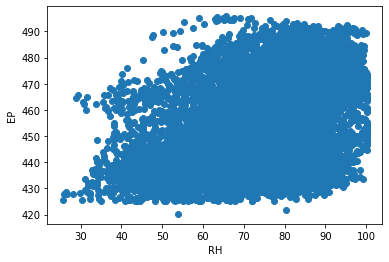

In [4]:
plt.scatter(data['RH'], data['PE'])
plt.ylabel("EP")
plt.xlabel("RH")
print("The relationship between relative humidity and enegry output appears to have no significant relationship.")

The relationship between exhaust vacuum and enegry output appears to be negatively correlated.


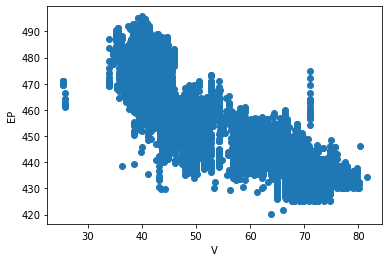

In [5]:
plt.scatter(data['V'], data['PE'])
plt.ylabel("EP")
plt.xlabel("V")
print("The relationship between exhaust vacuum and enegry output appears to be negatively correlated.")

##### Statistics Summary

In [6]:
print(data['AT'].describe())
print(data['V'].describe())
print(data['AP'].describe())
print(data['RH'].describe())
print(data['PE'].describe())

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64
count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: V, dtype: float64
count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: AP, dtype: float64
count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: RH, dtype: float64
count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64


In [7]:

Statistics = pd.DataFrame()

Stat = ["Mean", "Median", "Range", "Q1", "Q3", "IQR"]
Statistics["Stat"] = Stat


AT=[19.65, 20.35, 35.3, 13.51, 25.72, 12.21]
Statistics["AT"]=AT

V=[54.31, 52.08, 56.2, 41.74, 66.54, 24.8]
Statistics["V"]=V

AP=[1013.26, 1012.94, 40.41, 1009.10, 1017.26, 8.16]
Statistics["AP"]=AP

RH=[73.308978, 74.98, 74.6, 63.33, 84.83, 21.5]
Statistics["RH"]=RH

EP=[454.37, 451.55, 75.5, 439.75, 468.43, 28.68]
Statistics["EP"]=EP

print(Statistics)


     Stat     AT      V       AP         RH      EP
0    Mean  19.65  54.31  1013.26  73.308978  454.37
1  Median  20.35  52.08  1012.94  74.980000  451.55
2   Range  35.30  56.20    40.41  74.600000   75.50
3      Q1  13.51  41.74  1009.10  63.330000  439.75
4      Q3  25.72  66.54  1017.26  84.830000  468.43
5     IQR  12.21  24.80     8.16  21.500000   28.68


### Fit a linear regression to each predictor

In [8]:
import seaborn as sns

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:02:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

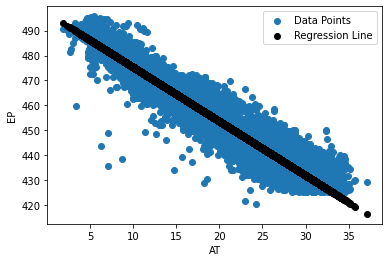

In [9]:
AT_train_X = data['AT'].copy()
AT_train_X = sm.add_constant(AT_train_X, prepend=False)
slr_AT = sm.OLS(data['PE'], AT_train_X).fit()
print(slr_AT.summary())


slr_pred_AT = slr_AT.predict(AT_train_X)
plt.scatter(data['AT'], data['PE'], label='Data Points')
plt.scatter(data['AT'], slr_pred_AT, color='k', label='Regression Line')
plt.ylabel("EP")
plt.xlabel("AT")
plt.legend(loc='upper right')
plt.show()



<AxesSubplot:xlabel='AT', ylabel='PE'>

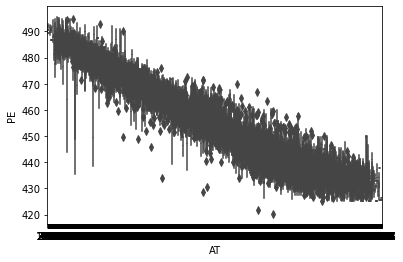

In [10]:
print("Outliers highlighted by diamonds in the boxplot.")
sns.boxplot(x=data['AT'], y=data['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:03:16   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

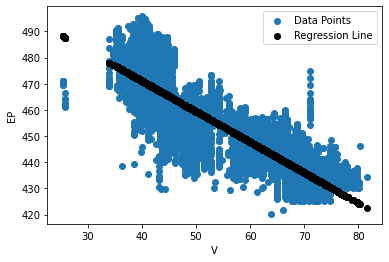

In [11]:
V_train_X = data['V'].copy()
V_train_X = sm.add_constant(V_train_X, prepend=False)
slr_V = sm.OLS(data['PE'], V_train_X).fit()
print(slr_V.summary())
slr_pred_V = slr_V.predict(V_train_X)
plt.scatter(data['V'], data['PE'], label='Data Points')
plt.scatter(data['V'], slr_pred_V, color='k', label='Regression Line')
plt.ylabel("EP")
plt.xlabel("V")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='V', ylabel='PE'>

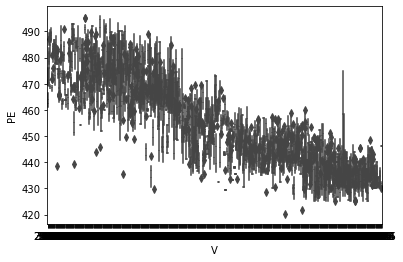

In [12]:
print("Outliers highlighted by diamonds in the boxplot.")
sns.boxplot(x=data['V'], y=data['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:03:27   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

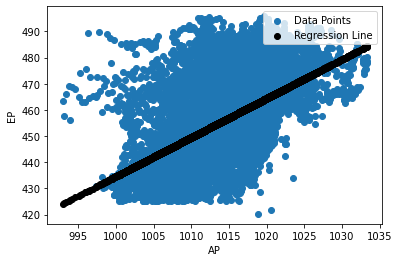

In [13]:
AP_train_X = data['AP'].copy()
AP_train_X = sm.add_constant(AP_train_X, prepend=False)
slr_AP = sm.OLS(data['PE'], AP_train_X).fit()
print(slr_AP.summary())
slr_pred_AP = slr_AP.predict(AP_train_X)
plt.scatter(data['AP'], data['PE'], label='Data Points')
plt.scatter(data['AP'], slr_pred_AP, color='k', label='Regression Line')
plt.ylabel("EP")
plt.xlabel("AP")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='AP', ylabel='PE'>

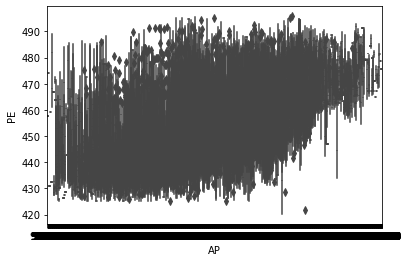

In [14]:
print("Outliers highlighted by diamonds in the boxplot.")
sns.boxplot(x=data['AP'], y=data['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:04:15   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

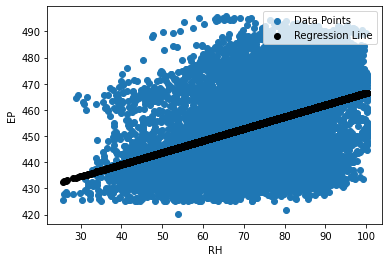

In [15]:
RH_train_X = data['RH'].copy()
RH_train_X = sm.add_constant(RH_train_X, prepend=False)
slr_RH = sm.OLS(data['PE'], RH_train_X).fit()
print(slr_RH.summary())
slr_pred_RH = slr_RH.predict(RH_train_X)
plt.scatter(data['RH'], data['PE'], label='Data Points')
plt.scatter(data['RH'], slr_pred_RH, color='k', label='Regression Line')
plt.ylabel("EP")
plt.xlabel("RH")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='RH', ylabel='PE'>

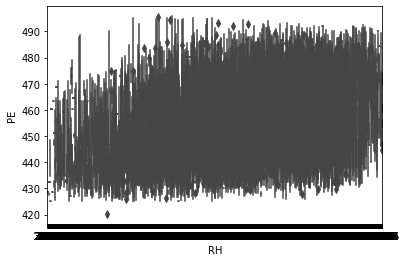

In [16]:
print("Outliers highlighted by diamonds in the boxplot.")
sns.boxplot(x=data['RH'], y=data['PE'])

### Multiple Regression Model

H0 : βj = 0

In [17]:
import statsmodels.api as sm

#multi_train_X are my columns that I want to use as predictors
multi_train_X = data[['AT', 'V', 'AP', 'RH']]
#add_constant gives you your B0 or Y intercept
multi_train_X = sm.add_constant(multi_train_X, prepend=False)

#fit the model to the data - sm.OLS(Y, X data)
multi_slr = sm.OLS(data['PE'], multi_train_X).fit()
print(multi_slr.summary())
print("\nFrom the results, we fail to reject the null hypothesis that βj = 0 for any of the predictors, as all p-values are equal to 0.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:05:36   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

(e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

##### Plot Multiple Regression Coefficients vs Univariate Coefficient

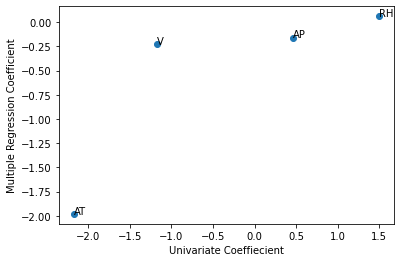

In [18]:
#Order (top to bottom) : AT, V, AP, RH
#With X column being univariate coeffs and Y column being multivariate coeffs
singleVsMulti = pd.DataFrame()

X=[-2.17, -1.17, 1.49, .46]
singleVsMulti['X'] = X

Y=[-1.98, -.23, .06, -.16]
singleVsMulti['Y'] = Y

plt.scatter(singleVsMulti['X'], singleVsMulti['Y'])
plt.xlabel('Univariate Coeffiecient')
plt.ylabel('Multiple Regression Coefficient')

# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
labels = ['AT', 'V', 'RH', 'AP']
for i, txt in enumerate(labels):
    plt.annotate(txt, (X[i], Y[i]))

### Evidence of Non-Linear Associations

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
train_X2_AT = data['AT'].copy()
train_X2_AT = train_X2_AT.to_numpy().reshape(-1,1)
poly_train_X_AT = PolynomialFeatures(degree=2).fit_transform(train_X2_AT)
# print(poly_train_X_AT[:,1]) for degree 1 column
# print(poly_train_X_AT[:,2]) for degree 2 column

poly_slr_AT = sm.OLS(data['PE'], poly_train_X_AT).fit()
print(poly_slr_AT.summary())
print("\nThe p-value of 0.000 for the X^2 term of the regression function indicates there is evidence of a nonlinear association between ambient temperature and energy output.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:05:37   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

In [21]:
train_X2_V = data['V'].copy()
train_X2_V = train_X2_V.to_numpy().reshape(-1,1)
poly_train_X_V = PolynomialFeatures(degree=2).fit_transform(train_X2_V)


poly_slr_V = sm.OLS(data['PE'], poly_train_X_V).fit()
print(poly_slr_V.summary())
print("\nThe p-value of 0.000 for the X^2 term of the regression function indicates there is evidence of a nonlinear association between exhaust vacuum and energy output.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:05:37   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

In [22]:
train_X2_AP = data['AP'].copy()
train_X2_AP = train_X2_AP.to_numpy().reshape(-1,1)
poly_train_X_AP = PolynomialFeatures(degree=2).fit_transform(train_X2_AP)


poly_slr_AP = sm.OLS(data['PE'], poly_train_X_AP).fit()
print(poly_slr_AP.summary())
print("\nThe p-value of 0.000 for the X^2 term of the regression function indicates there is evidence of a nonlinear association between ambient pressure and energy output.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:05:37   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

In [23]:
train_X2_RH = data['RH'].copy()
train_X2_RH = train_X2_RH.to_numpy().reshape(-1,1)
poly_train_X_RH = PolynomialFeatures(degree=2).fit_transform(train_X2_RH)
# print(poly_train_X_AT[:,1]) for degree 1 column
# print(poly_train_X_AT[:,2]) for degree 2 column

poly_slr_RH = sm.OLS(data['PE'], poly_train_X_RH).fit()
print(poly_slr_RH.summary())
print("\nThe p-value of 0.215 for the X^2 term of the regression function indicates there is no evidence of a nonlinear association between relative humidity and energy output.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:05:37   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

### Evidence of Interactions Between Predictors

Model: Y = B0 + B1(AT) + B2(V) + B3(AP) + B4(RH) + B5(AT * V) + B6(AT * AP) + B7(AT * RH) + B8(V * AP) + B9(V * RH) + B10(AP * RH)

In [24]:
train_X_interactions = data[['AT', 'V', 'AP', 'RH']]
train_X_interactions['AT*V'] = data['AT'] * data['V']
train_X_interactions['AT*AP'] = data['AT'] * data['AP']
train_X_interactions['AT*RH'] = data['AT'] * data['RH']
train_X_interactions['V*AP'] = data['V'] * data['AP']
train_X_interactions['V*RH'] = data['V'] * data['RH']
train_X_interactions['RH*AP'] = data['RH'] * data['AP']


interaction_slr = sm.OLS(data['PE'], train_X_interactions).fit()
print(interaction_slr.summary())
print("\nFrom the regression, we have evidence to reject that β=0 for interaction terms: AT*V, AT*RH, V*AP, and RH*AP.")

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.057e+07
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                        0.00
Time:                        14:05:37   Log-Likelihood:                         -27586.
No. Observations:                9568   AIC:                                  5.519e+04
Df Residuals:                    9558   BIC:                                  5.526e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### KNN Regression

K-nearest neighbor regression using both normalized and raw features for k ∈ {1, 2, . . . , 100}. Addionally plot of train and test errors in terms of 1/k.

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

The k value that gives the best fit is k*= 13  for normalized data.


[Text(0.5, 0, '1/k'), Text(0, 0.5, 'Error')]

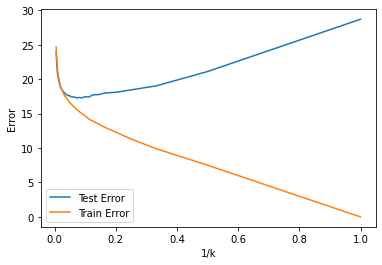

In [26]:
# Normalize Data
transformer = Normalizer().fit(data[['AT', 'V', 'AP', 'RH']])
data_norm = transformer.transform(data[['AT', 'V', 'AP', 'RH']])
# print(data_norm)

#Create Test and Training Data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(data_norm, data['PE'], test_size=0.30, random_state=30)

train_errors = []
test_errors = []
x_axis_k = []

for i in range(1,200,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_norm, y_train_norm)
    train_pred = knn.predict(X_train_norm)
#     print(mean_squared_error(y_train_norm, train_pred))
    train_errors.append(mean_squared_error(y_train_norm, train_pred))

    test_pred = knn.predict(X_test_norm)
#     print(mean_squared_error(y_test_norm, test_pred))
    test_errors.append(mean_squared_error(y_test_norm, test_pred))
    
    x_axis_k.append((1/i))

best_fit = np.argmin(test_errors)
print("The k value that gives the best fit is k*=", best_fit, " for normalized data.")
# print(train_errors)
# print(test_errors)

plot = sns.lineplot(x=x_axis_k, y=test_errors, label=str('Test Error'))
plot = sns.lineplot(x=x_axis_k, y=train_errors, label=str('Train Error'))
plot.set(xlabel='1/k', ylabel='Error')

The k value that gives the best fit is k*= 5  for raw data.


[Text(0.5, 0, '1/k'), Text(0, 0.5, 'Error')]

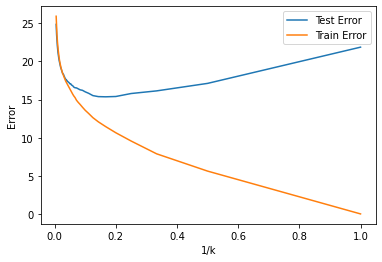

In [27]:
#Create Test and Training Data
X_train, X_test, y_train, y_test = train_test_split(data[['AT', 'V', 'AP', 'RH']], data['PE'], test_size=0.30, random_state=30)

train_errors = []
test_errors = []
x_axis_k = []

for i in range(1,200,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
#     print(mean_squared_error(y_train_norm, train_pred))
    train_errors.append(mean_squared_error(y_train, train_pred))

    test_pred = knn.predict(X_test)
#     print(mean_squared_error(y_test_norm, test_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))
    
    x_axis_k.append((1/i))

best_fit = np.argmin(test_errors)
print("The k value that gives the best fit is k*=", best_fit, " for raw data.")
# print(train_errors)
# print(test_errors)

plot = sns.lineplot(x=x_axis_k, y=test_errors, label=str('Test Error'))
plot = sns.lineplot(x=x_axis_k, y=train_errors, label=str('Train Error'))
plot.set(xlabel='1/k', ylabel='Error')